In [1]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

In [2]:
application_record_file = "Resources/application_record.csv"
credit_record_file = "Resources/credit_record.csv"

application_record = pd.read_csv(application_record_file)
credit_record = pd.read_csv(credit_record_file)

In [3]:
application_record.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0


In [4]:
credit_record.head()

,ID,MONTHS_BALANCE,STATUS
0,5001711,0,X
1,5001711,-1,0
2,5001711,-2,0
3,5001711,-3,0
4,5001712,0,C


## Application records data Engineering

In [5]:
application_record.isnull().values.any()

True

In [6]:
credit_record.isnull().values.any()

False

In [7]:
application_record.shape

(438557, 18)

In [8]:
# Renaming all nan values of occupation type as Other
application_record.OCCUPATION_TYPE.replace(np.nan, 'Other', inplace = True)
application_record.OCCUPATION_TYPE.value_counts()

Other                    134203
Laborers                  78240
Core staff                43007
Sales staff               41098
Managers                  35487
Drivers                   26090
High skill tech staff     17289
Accountants               15985
Medicine staff            13520
Cooking staff              8076
Security staff             7993
Cleaning staff             5845
Private service staff      3456
Low-skill Laborers         2140
Secretaries                2044
Waiters/barmen staff       1665
Realty agents              1041
HR staff                    774
IT staff                    604
Name: OCCUPATION_TYPE, dtype: int64

In [9]:
# Check datatypes 
application_record.dtypes

ID                       int64
CODE_GENDER             object
FLAG_OWN_CAR            object
FLAG_OWN_REALTY         object
CNT_CHILDREN             int64
AMT_INCOME_TOTAL       float64
NAME_INCOME_TYPE        object
NAME_EDUCATION_TYPE     object
NAME_FAMILY_STATUS      object
NAME_HOUSING_TYPE       object
DAYS_BIRTH               int64
DAYS_EMPLOYED            int64
FLAG_MOBIL               int64
FLAG_WORK_PHONE          int64
FLAG_PHONE               int64
FLAG_EMAIL               int64
OCCUPATION_TYPE         object
CNT_FAM_MEMBERS        float64
dtype: object

In [10]:
# application_record.duplicated().count()
# application_record[application_record.duplicated()]
application_record.nunique()

ID                     438510
CODE_GENDER                 2
FLAG_OWN_CAR                2
FLAG_OWN_REALTY             2
CNT_CHILDREN               12
AMT_INCOME_TOTAL          866
NAME_INCOME_TYPE            5
NAME_EDUCATION_TYPE         5
NAME_FAMILY_STATUS          5
NAME_HOUSING_TYPE           6
DAYS_BIRTH              16379
DAYS_EMPLOYED            9406
FLAG_MOBIL                  1
FLAG_WORK_PHONE             2
FLAG_PHONE                  2
FLAG_EMAIL                  2
OCCUPATION_TYPE            19
CNT_FAM_MEMBERS            13
dtype: int64

In [11]:
# Get the list of all categorical columns
categorical_cols = application_record.select_dtypes(exclude='number').columns.tolist()
categorical_cols

['CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'OCCUPATION_TYPE']

In [12]:
# list all unique values all categorical columns
for li in categorical_cols:
    print(f">>> {li} => {application_record[li].unique()}\n  --------------------------------------------")

print("\n____________________________\nCREDIT RECORD STATUS UNIQUE VALUES")

>>> CODE_GENDER => ['M' 'F']
  --------------------------------------------
>>> FLAG_OWN_CAR => ['Y' 'N']
  --------------------------------------------
>>> FLAG_OWN_REALTY => ['Y' 'N']
  --------------------------------------------
>>> NAME_INCOME_TYPE => ['Working' 'Commercial associate' 'Pensioner' 'State servant' 'Student']
  --------------------------------------------
>>> NAME_EDUCATION_TYPE => ['Higher education' 'Secondary / secondary special' 'Incomplete higher'
 'Lower secondary' 'Academic degree']
  --------------------------------------------
>>> NAME_FAMILY_STATUS => ['Civil marriage' 'Married' 'Single / not married' 'Separated' 'Widow']
  --------------------------------------------
>>> NAME_HOUSING_TYPE => ['Rented apartment' 'House / apartment' 'Municipal apartment'
 'With parents' 'Co-op apartment' 'Office apartment']
  --------------------------------------------
>>> OCCUPATION_TYPE => ['Other' 'Security staff' 'Sales staff' 'Accountants' 'Laborers'
 'Managers' 'Drive

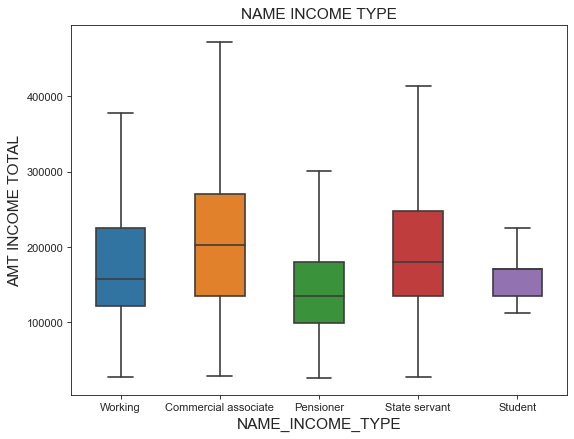

In [13]:
import matplotlib.pyplot as plt
from matplotlib import gridspec
import seaborn as sns
sns.set_style("ticks")

plt.figure(figsize=(8, 6), dpi=80)

name_income_type_df = application_record[["NAME_INCOME_TYPE", "AMT_INCOME_TOTAL"]]
# name_income_type_df = name_income_type_df["AMT_INCOME_TOTAL"].groupby(name_income_type_df["NAME_INCOME_TYPE"]).mean()
# name_income_type_df

sns.boxplot(x='NAME_INCOME_TYPE', y='AMT_INCOME_TOTAL', data=name_income_type_df, showfliers=False, width=0.5)
plt.yticks(fontsize=10)
plt.xticks(fontsize=10)
plt.xlabel('NAME_INCOME_TYPE', fontsize=14)
plt.ylabel('AMT INCOME TOTAL', fontsize=14)
plt.title(f'NAME INCOME TYPE', fontsize=14)
plt.savefig('boxplot.png', dpi=80, bbox_inches = 'tight');


### Encoding Categorical columns

In [14]:
# Encoding NAME_INCOME_TYPE column
name_income_type_mapper = {'Working': 2, 'Commercial associate': 4, 'Pensioner': 1, 'State servant': 3, 'Student': 0}
application_record["NAME_INCOME_TYPE"] = application_record["NAME_INCOME_TYPE"].replace(name_income_type_mapper)

#  Encoding NAME_EDUCATION_TYPE column
name_education_type_mapper = {'Higher education': 3, 'Secondary / secondary special': 1, 'Incomplete higher': 2,
 'Lower secondary': 0, 'Academic degree': 4}
application_record["NAME_EDUCATION_TYPE"] = application_record["NAME_EDUCATION_TYPE"].replace(name_education_type_mapper)

#  Encoding NAME_FAMILY_STATUS column
name_family_status_mapper = {'Civil marriage': 3, 'Married': 4, 'Single / not married': 0, 'Separated': 1, 'Widow': 2}
application_record["NAME_FAMILY_STATUS"] = application_record["NAME_FAMILY_STATUS"].replace(name_family_status_mapper)

#  Encoding NAME_HOUSING_TYPE column
name_housing_type_mapper = {'Rented apartment': 1, 'House / apartment': 2, 'Municipal apartment': 1, 'With parents': 0, 
                            'Co-op apartment': 1, 'Office apartment': 1}
application_record["NAME_HOUSING_TYPE"] = application_record["NAME_HOUSING_TYPE"].replace(name_housing_type_mapper)

#  Encoding OCCUPATION_TYPE column
occupation_type_mapper = {'Other': 0, 'Security staff': 2, 'Sales staff': 3, 'Accountants': 6, 'Laborers': 1, 'Managers': 5, 'Drivers': 2,
                           'Core staff': 4, 'High skill tech staff': 6, 'Cleaning staff': 1, 'Private service staff': 4, 'Cooking staff': 3, 
                           'Low-skill Laborers': 0, 'Medicine staff': 6, 'Secretaries': 3, 'Waiters/barmen staff': 2, 'HR staff': 4, 
                           'Realty agents': 4, 'IT staff': 5}
application_record["OCCUPATION_TYPE"] = application_record["OCCUPATION_TYPE"].replace(occupation_type_mapper)



application_record.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,2,3,3,1,-12005,-4542,1,1,0,0,0,2.0
1,5008805,M,Y,Y,0,427500.0,2,3,3,1,-12005,-4542,1,1,0,0,0,2.0
2,5008806,M,Y,Y,0,112500.0,2,1,4,2,-21474,-1134,1,0,0,0,2,2.0
3,5008808,F,N,Y,0,270000.0,4,1,0,2,-19110,-3051,1,0,1,1,3,1.0
4,5008809,F,N,Y,0,270000.0,4,1,0,2,-19110,-3051,1,0,1,1,3,1.0


In [15]:
# Encoding binary categorical (CODE_GENDER, FLAG_OWN_CAR, FLAG_OWN_REALTY) variables using get_dummies
application_record = pd.get_dummies(application_record)
application_record.head()

,ID,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,...,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,CODE_GENDER_F,CODE_GENDER_M,FLAG_OWN_CAR_N,FLAG_OWN_CAR_Y,FLAG_OWN_REALTY_N,FLAG_OWN_REALTY_Y
0,5008804,0,427500.0,2,3,3,1,-12005,-4542,1,...,0,0,0,2.0,0,1,0,1,0,1
1,5008805,0,427500.0,2,3,3,1,-12005,-4542,1,...,0,0,0,2.0,0,1,0,1,0,1
2,5008806,0,112500.0,2,1,4,2,-21474,-1134,1,...,0,0,2,2.0,0,1,0,1,0,1
3,5008808,0,270000.0,4,1,0,2,-19110,-3051,1,...,1,1,3,1.0,1,0,1,0,0,1
4,5008809,0,270000.0,4,1,0,2,-19110,-3051,1,...,1,1,3,1.0,1,0,1,0,0,1


## Credit Record Engineering

In [16]:
credit_record.head(50)

,ID,MONTHS_BALANCE,STATUS
0,5001711,0,X
1,5001711,-1,0
2,5001711,-2,0
3,5001711,-3,0
4,5001712,0,C
5,5001712,-1,C
6,5001712,-2,C
7,5001712,-3,C
8,5001712,-4,C
9,5001712,-5,C


In [17]:
print(credit_record.STATUS.unique())

['X' '0' 'C' '1' '2' '3' '4' '5']


In [18]:
# Since the "X" value signifies "No loan for the month", this can be counted as irrelevant 
# to whether or not they defaulted and if used could create bias
# There are a lot of account numbers with a month_balances with corresponding status labeled as "X" so can't be used
credit_record.drop(credit_record[credit_record["STATUS"] == "X"].index, inplace = True)
credit_record.head(50)

,ID,MONTHS_BALANCE,STATUS
1,5001711,-1,0
2,5001711,-2,0
3,5001711,-3,0
4,5001712,0,C
5,5001712,-1,C
6,5001712,-2,C
7,5001712,-3,C
8,5001712,-4,C
9,5001712,-5,C
10,5001712,-6,C


In [19]:
# Replace categorical credit status values with binary values
credit_record = credit_record.apply(lambda x: x.replace({'C': 0, '0' : 0, '1' : 1, '2' : 1, '3' : 1, '4' : 1, '5' : 1}, regex=True))
display(credit_record['STATUS'].head())
display(credit_record['STATUS'].value_counts())

1    0
2    0
3    0
4    0
5    0
Name: STATUS, dtype: int64

0    825151
1     14194
Name: STATUS, dtype: int64

In [20]:
credit_record.tail()

,ID,MONTHS_BALANCE,STATUS
1048507,5150482,-24,0
1048508,5150482,-25,0
1048509,5150482,-26,0
1048510,5150482,-27,0
1048511,5150482,-28,0
1048530,5150484,0,0
1048531,5150484,-1,0
1048532,5150484,-2,0
1048533,5150484,-3,0
1048534,5150484,-4,0


In [21]:
credit_record = credit_record['STATUS'].groupby(credit_record['ID']).mean().reset_index()

In [22]:
credit_record = pd.DataFrame(credit_record)

In [23]:
credit_record.head()

,ID,STATUS
0,5001711,0.000000
1,5001712,0.000000
2,5001717,0.000000
3,5001718,0.068966
4,5001719,0.000000


In [24]:
credit_record["STATUS"].describe()

count    41449.000000
mean         0.018547
std          0.075085
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: STATUS, dtype: float64

In [25]:
# Replace float values with binaries
credit_record["Status2"] = credit_record["STATUS"].apply(lambda x: 1 if x > 0 else 0)
credit_record.rename(columns = {"STATUS" : "MONTH_BAL_AVG", "Status2" : "STATUS"}, inplace = True)
credit_record.head(50)

,ID,MONTH_BAL_AVG,STATUS
0,5001711,0.000000,0
1,5001712,0.000000,0
2,5001717,0.000000,0
3,5001718,0.068966,1
4,5001719,0.000000,0
5,5001720,0.194444,1
6,5001723,0.000000,0
7,5001724,0.000000,0
8,5001725,0.000000,0
9,5001726,0.000000,0


## Merging both datasets

In [26]:
# Merge the two datasets keeping only IDs common to both dataframes
full_df = application_record.merge(credit_record, on=['ID'], how='inner')
full_df

,ID,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,...,OCCUPATION_TYPE,CNT_FAM_MEMBERS,CODE_GENDER_F,CODE_GENDER_M,FLAG_OWN_CAR_N,FLAG_OWN_CAR_Y,FLAG_OWN_REALTY_N,FLAG_OWN_REALTY_Y,MONTH_BAL_AVG,STATUS
0,5008804,0,427500.0,2,3,3,1,-12005,-4542,1,...,0,2.0,0,1,0,1,0,1,0.066667,1
1,5008805,0,427500.0,2,3,3,1,-12005,-4542,1,...,0,2.0,0,1,0,1,0,1,0.071429,1
2,5008806,0,112500.0,2,1,4,2,-21474,-1134,1,...,2,2.0,0,1,0,1,0,1,0.000000,0
3,5008808,0,270000.0,4,1,0,2,-19110,-3051,1,...,3,1.0,1,0,1,0,0,1,0.000000,0
4,5008810,0,270000.0,4,1,0,2,-19110,-3051,1,...,3,1.0,1,0,1,0,0,1,0.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33105,5149828,0,315000.0,2,1,4,2,-17348,-2420,1,...,5,2.0,0,1,0,1,0,1,1.000000,1
33106,5149834,0,157500.0,4,3,4,2,-12387,-1325,1,...,6,2.0,1,0,1,0,0,1,0.750000,1
33107,5149838,0,157500.0,1,3,4,2,-12387,-1325,1,...,6,2.0,1,0,1,0,0,1,0.545455,1
33108,5150049,0,283500.0,2,1,4,2,-17958,-655,1,...,3,2.0,1,0,1,0,0,1,0.200000,1


In [27]:
print("Bad Credit: "+str(len(full_df[full_df["STATUS"] == 1])))
print("Good Credit: "+str (len(full_df[full_df["STATUS"] == 0])))
print(f"Good Credit: "+str (len(full_df[full_df["STATUS"] == 0])))

Bad Credit: 4291
Good Credit: 28819
Good Credit: 28819


In [28]:
full_df.to_csv("Output/full_data.csv", index=False)